<a href="https://colab.research.google.com/github/Yomunozs/Procesamiento_Digital_de_Senales/blob/main/PDS_simulacion_filtros_20_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift, fftfreq
from scipy.signal import windows

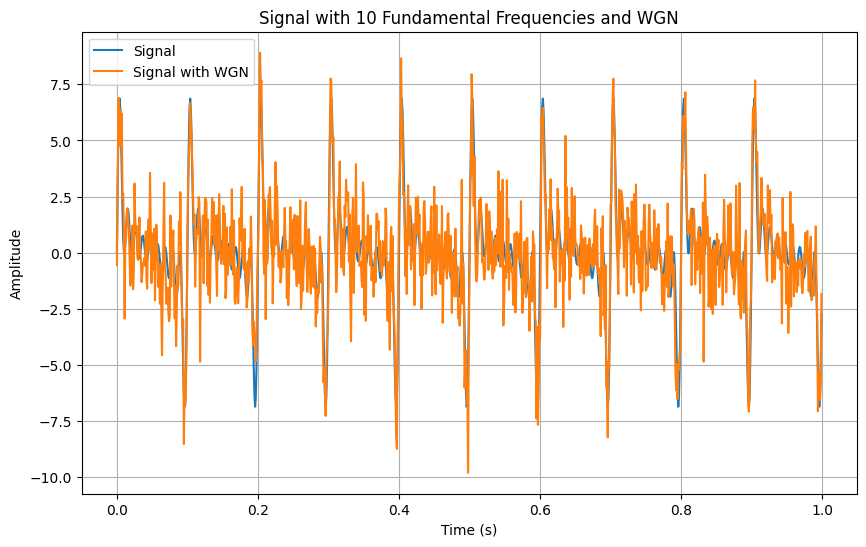

In [ ]:
# Define parameters
fs = 1000  # Sampling frequency
duration = 1  # Duration of the signal in seconds
t = np.arange(0, duration, 1/fs)  # Time vector

# Fundamental frequencies
fundamental_frequencies = np.arange(10, 100, 10)

# Generate signal with multiple fundamental frequencies
signal = np.zeros_like(t)
for freq in fundamental_frequencies:
  signal += np.sin(2 * np.pi * freq * t)

# Calculate the amplitude of the signal
signal_amplitude = np.max(signal) - np.min(signal)

# Generate white Gaussian noise (WGN)
noise_amplitude = 0.1 * signal_amplitude
noise = np.random.normal(0, noise_amplitude, len(t))

# Add noise to the signal
noisy_signal = signal + noise

# Plot the signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Signal')
plt.plot(t, noisy_signal, label='Signal with WGN')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with 10 Fundamental Frequencies and WGN')
plt.legend()
plt.grid(True)
plt.show()

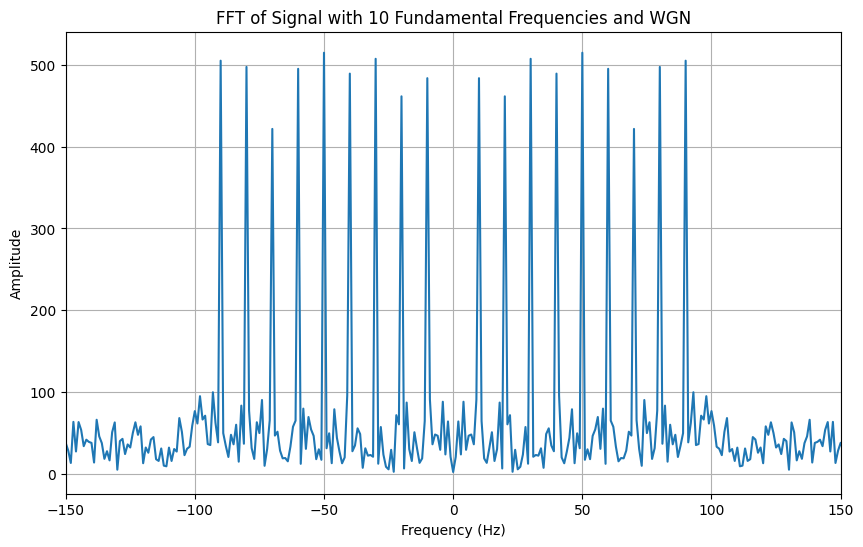

In [ ]:
# Perform FFT
# Calculate the frequencies corresponding to the FFT values
w = fftfreq(len(t), 1/fs)
# Shift the frequencies and FFT values for better visualization
w_shift = fftshift(w)
f_shift = fftshift(fft(noisy_signal))
# Calculate the magnitude of the FFT
f_shift = np.abs(f_shift)


plt.figure(figsize=(10, 6))
plt.plot(w_shift, np.abs(f_shift))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-150, 150)
plt.title('FFT of Signal with 10 Fundamental Frequencies and WGN')
plt.grid(True)
plt.show()

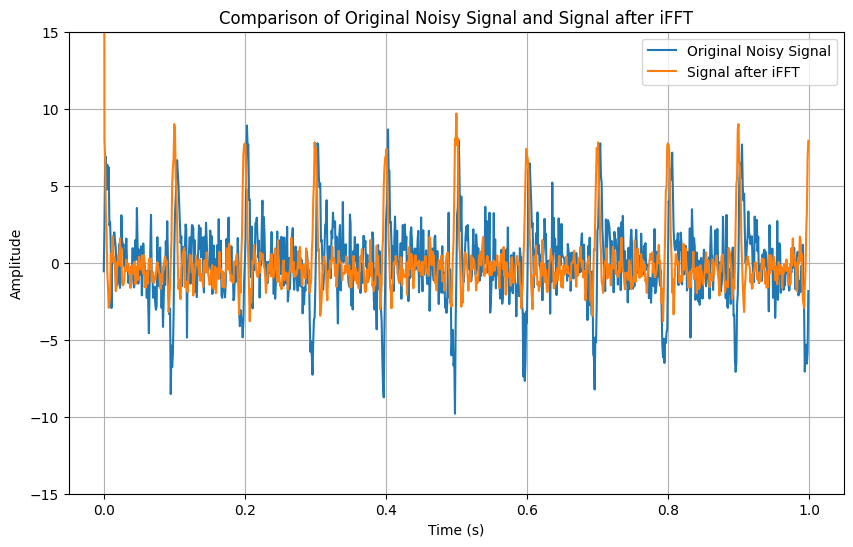

In [ ]:
# Apply iFFT to f_shift
signal_ifft = ifft(fftshift(f_shift))

# Compare the original noisy signal with the signal obtained after iFFT
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label='Original Noisy Signal')
plt.plot(t, signal_ifft.real, label='Signal after iFFT')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-15, 15)
plt.title('Comparison of Original Noisy Signal and Signal after iFFT')
plt.legend()
plt.grid(True)
plt.show()

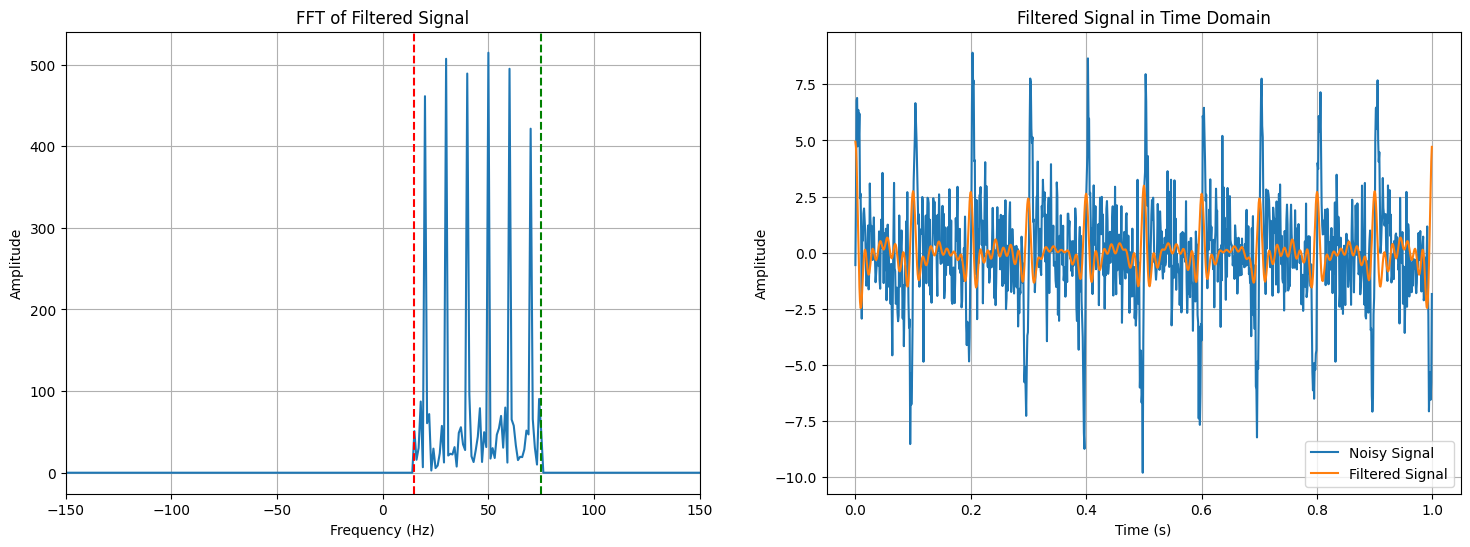

In [ ]:
# Apply the bandpass filter
low_cutoff = 15
high_cutoff = 75
indices = np.where((w_shift >= low_cutoff) & (w_shift <= high_cutoff))
f_shift_filtered = np.copy(f_shift)
f_shift_filtered[~np.isin(np.arange(len(w_shift)), indices)] = 0


# Apply the inverse FFT to obtain the filtered signal
filtered_signal = ifft(fftshift(f_shift_filtered))



plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(w_shift, np.abs(f_shift_filtered))
plt.axvline(x=low_cutoff, color='r', linestyle='--', label='Low Cutoff')
plt.axvline(x=high_cutoff, color='g', linestyle='--', label='High Cutoff')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-150, 150)
plt.title('FFT of Filtered Signal')
plt.grid(True)


# Plot the filtered signal
plt.subplot(1, 2, 2)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal in Time Domain')
plt.legend()
plt.grid(True)
plt.show()

# Tarea 27/11/2024.

Equalizador de 5 bandas

Basado en el codigo: ( notebooks/1. Representación y Análisis de Señales/2.3 Equalizador.ipynb, del repositorio: github.com/YeisonCardona/procesamiento-senales/)

In [ ]:
!pip install dsp-utils -q

In [ ]:
# Se importan las librerias a utilizar
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq

from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer



In [ ]:
# Funcion de filtrado
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    signal_filtered = f(signal)
    return signal_filtered

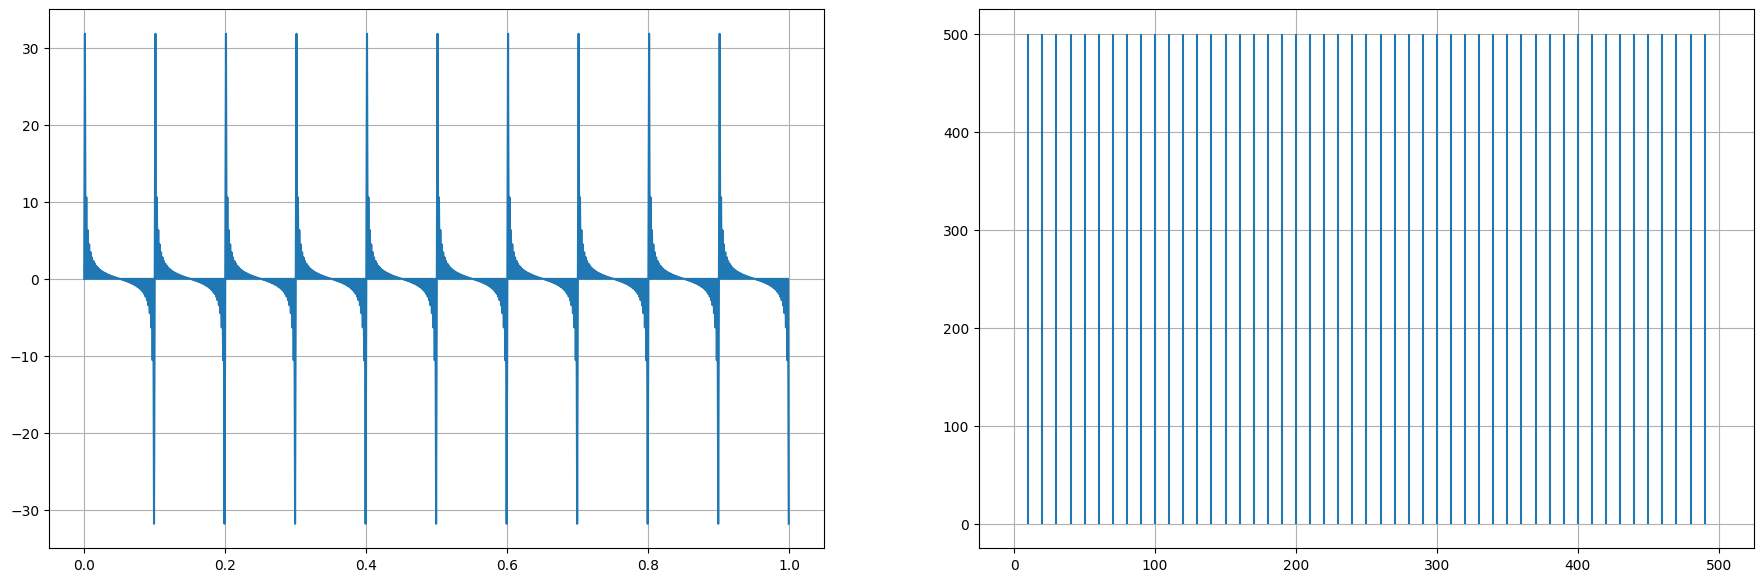

In [ ]:
# Generacion de señal a utilizar, se toma la señal anterior aumentando el rango de frecuencias hasta 500 hz

# Fundamental frequencies 500
fundamental_frequencies_500 = np.arange(10, 500, 10)

# Generate signal with multiple fundamental frequencies
signal_500 = np.zeros_like(t)
for freq in fundamental_frequencies_500:
  signal_500 += np.sin(2 * np.pi * freq * t)

# Plot the signal
vis = Visualizer(figsize=(22, 7), dpi=100)
vis.plot_dsp(signal_500, sample_rate=1000, time=t, ffn='vlines')

In [ ]:
# Equalizer Multiple band

def n_band_equalizer(signal_n, fc_array, wb, gain_array):
  i = 0 # Contador indices
  signal_eq = signal_n # Se copia la señal original
  for fc in fc_array: # Se recorre el arreglo de frecuencias a modificar
    s_filt = filter_(signal_n, fc-(wb/2), fc+(wb/2), fs) # Se usa el filtro para tomas cada banda y modificarla
    signal_eq = (signal_eq - s_filt) + (s_filt*np.power(10, (gain_array[i] / 20))) # Se agrega la banda modificada a la señal equalizada
    i += 1 # Se aactualiza el contador de indice
  return signal_eq


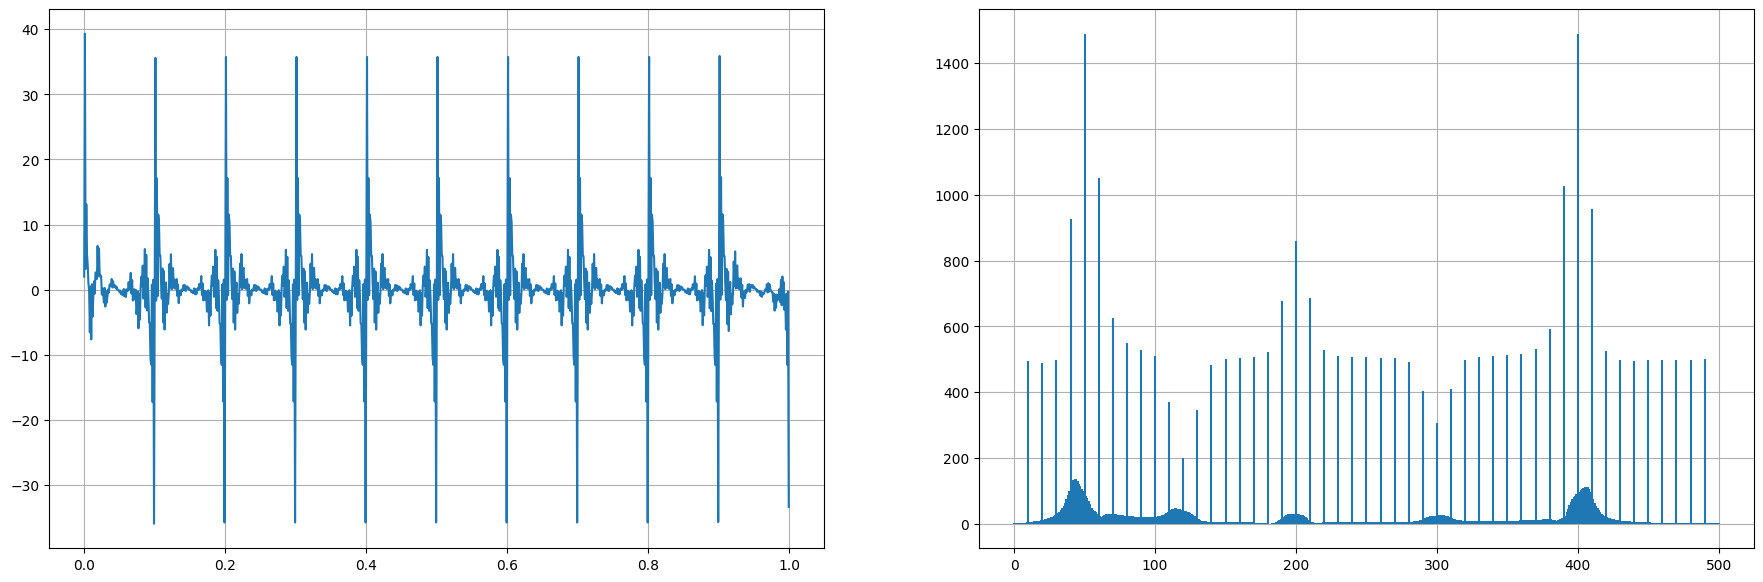

In [ ]:
# Prueba de funcionamiento

fc_array = [50, 120, 200, 300, 400]
wb =  20
gain_array = [10, -10, 5, -5, 10]

signal_eq = n_band_equalizer(signal_500, fc_array, wb, gain_array)
vis.plot_dsp(signal_eq, sample_rate=1000, time=t, ffn='vlines')

<Figure size 2200x700 with 0 Axes>

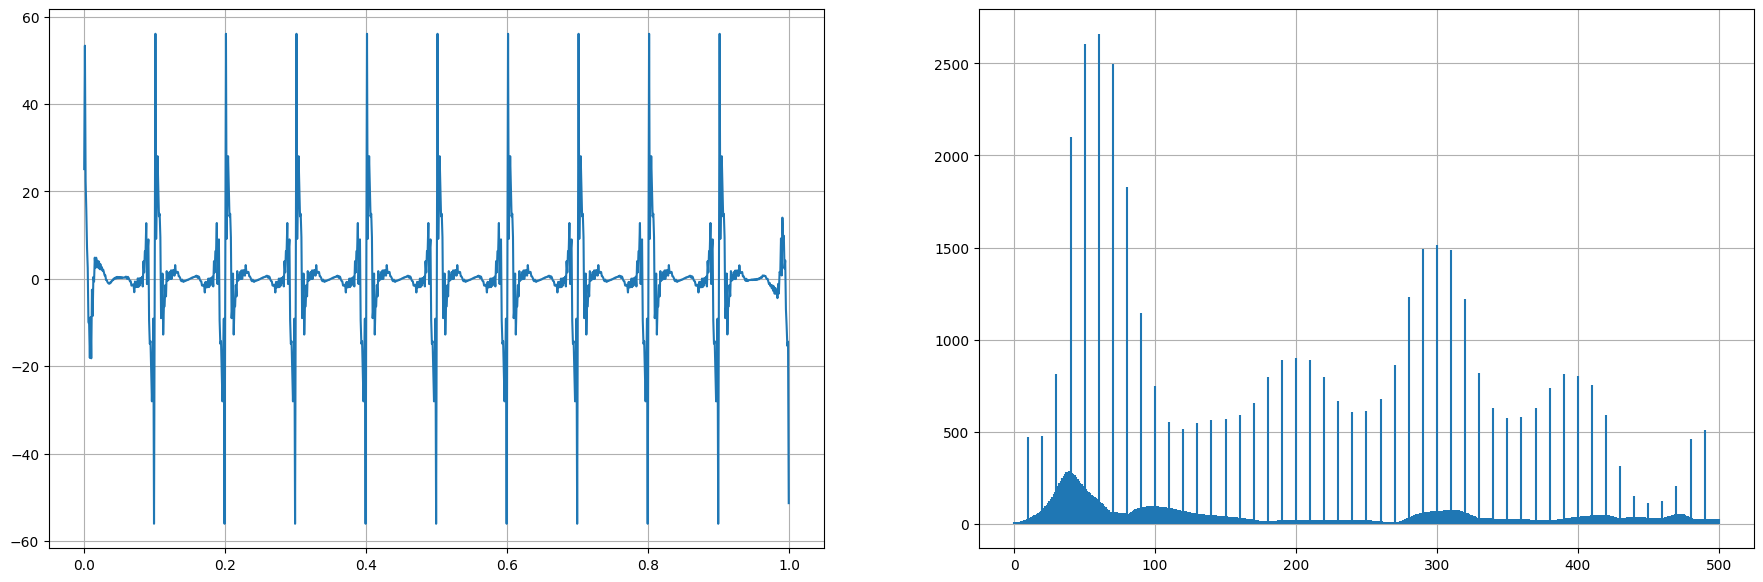

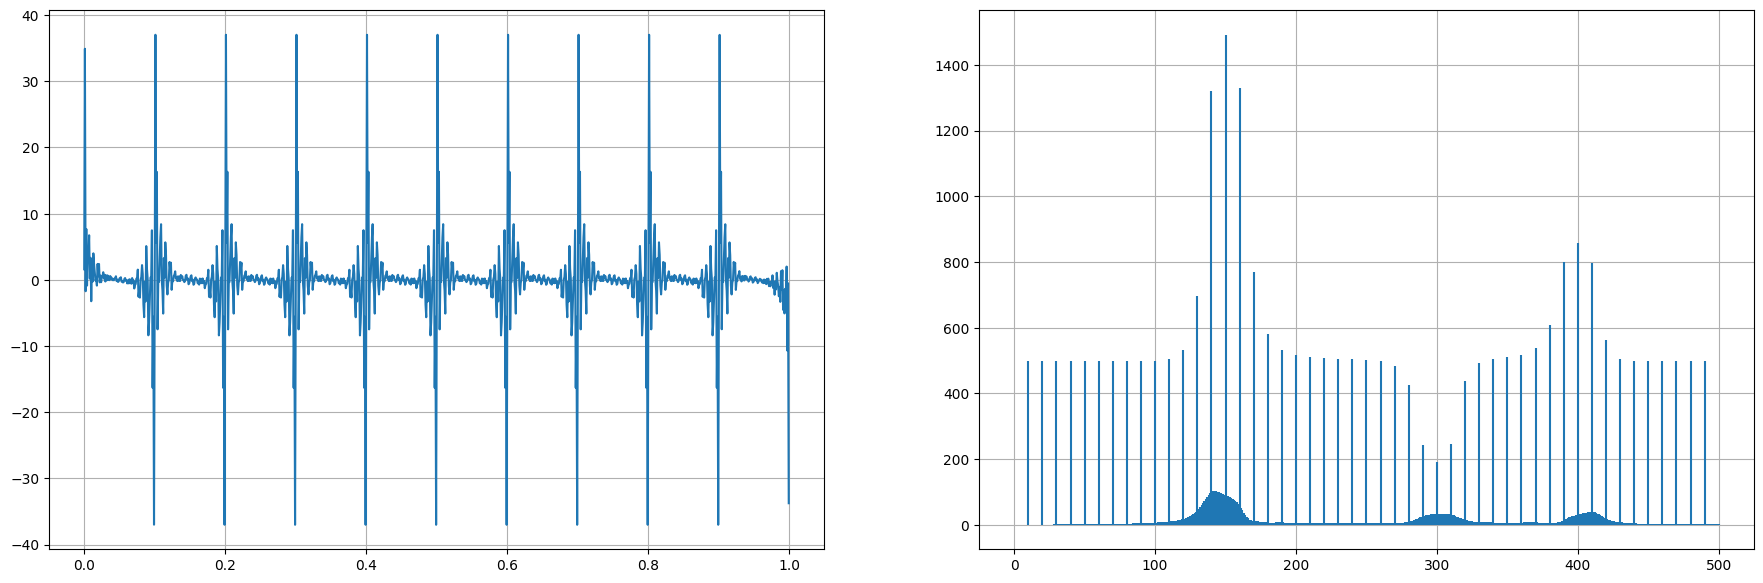

In [ ]:
# Prueba 2

plt.figure(figsize=(22, 7), dpi=100)

# 6 bandas
fc_array = [60, 100, 200, 300, 400, 450]
wb =  50
gain_array = [15, -8, 5, 10, 5, -15]

signal_eq = n_band_equalizer(signal_500, fc_array, wb, gain_array)
vis.plot_dsp(signal_eq, sample_rate=1000, time=t, ffn='vlines')

# 3 bandas
fc_array_2 = [150, 300, 400]
wb_2 = 30
gain_array_2 = [10, -10, 5]

signal_eq_2 = n_band_equalizer(signal_500, fc_array_2, wb_2, gain_array_2)
vis.plot_dsp(signal_eq_2, sample_rate=1000, time=t, ffn='vlines')

plt.show()